# Spline modelling electron insert factors using routine measurements

## Description
The code here provided is for the modelling of the portion of the electron output factor that is dependent on the shape of the shielding insert mounted within the applicator. This allows modelling insert factors using only the measured factors already available at a centre. Should all outliers be removed from the data set the user might expect as low as 0.5% standard uncertainty for factor prediction with as little as 8 data points.

The paper outlining this method is currently in press:
 
 > S. Biggs, M. Sobolewski, R. Murry, J. Kenny, Spline modelling electron insert factors using routine measurements. Physica Medica (2015), [doi:10.1016/j.ejmp.2015.11.002](http://dx.doi.org/10.1016/j.ejmp.2015.11.002). 

A pre-print of the accepted manuscript is available at my personal website: [simonbiggs.net/paper1](http://simonbiggs.net/paper1). If you have any issues please don't hesitate to contact me (mail@simonbiggs.net), I likely will be more than happy to help. 

Any use of the code accepts the AGPL3+ license which includes no warranty that this code is fit for a particular purpose. Attempts have been made to make the code transparent and it is recommended that an experienced python programmer and physicist who understands the procedure outlined in the paper and the requirements of your centre identifies whether or not this method and code is fit for your use.


## Installation for Windows
 * Download and install the relevant Anaconda Python 3.5 install from [continuum.io/downloads](https://www.continuum.io/downloads).
 * Install this package using pip:
   * `pip install electronfactors`
 * Installing shapely
  * Download the relevant shapely package from [http://www.lfd.uci.edu/~gohlke/pythonlibs/#shapely](http://www.lfd.uci.edu/~gohlke/pythonlibs/#shapely).
    * If you have 64-bit windows you will be looking for `Shapely-*.*.*-cp35-none-win_amd64.whl` (with * replaced by most recent shapely version).
  * Install shapely by:
    * Opening a command prompt and "cd" into the directory with the downloaded file
    * Then running `pip install Shapely-*.*.*-cp35-none-win_*.whl` (with * replaced with relevant file name).
 * Installing descartes
  * Run the following in a command prompt, `pip install descartes`


## Installation for Ubuntu 
From a fresh install of Ubuntu, using pip to install all dependencies the following method can be used. However, of course if you prefer, system packages may be used from apt-get, or conda from anaconda.

    sudo apt-get build-dep python-numpy matplotlib python-scipy pandas ipython pyzmq python-shapely pyyaml
    sudo apt-get install python3-pip
    sudo pip3 install --upgrade numpy matplotlib scipy pandas shapely descartes bokeh pyyaml jupyter electronfactors

## Explanation of use

### Importing all the packages to be used in this notebook


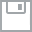
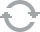
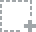
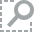
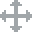
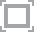
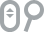
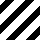
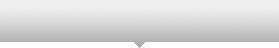
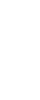
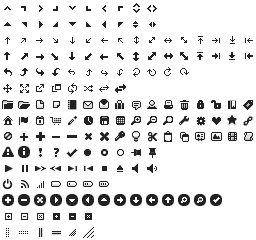
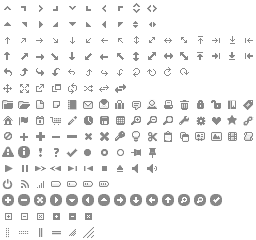
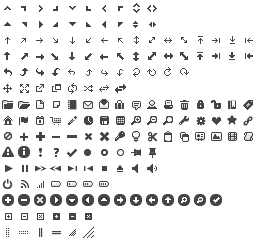
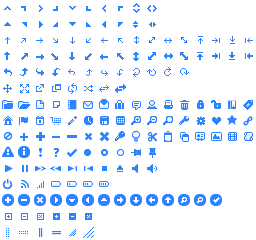
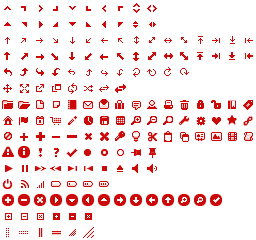
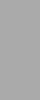
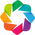
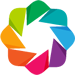

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline

from bokeh.io import output_notebook
output_notebook()

from electronfactors import generic_shape_convert, parameterise, create_report

### Some measured data

For this example we are using a set of seven clinical shapes accompanied by five generic shapes chosen to fill out the data set resulting in minimal measurement required after this point. These measurments were taken for shapes on a 10 cm applicator, for 12 MeV, at 100 SSD.

The generic shapes used were:

 * 3, 5, 7, and 9 cm circles
 * and a 3 x 13 cm ellipse

Here this data will be inputted as a python dictionary. A (simpler?) method to import via csv is explained in detail on the [github repository](https://github.com/SimonBiggs/electronfactors/blob/master/README.md#importing-your-insert-shapes).

The following series of cells is used to input this data.

In [2]:
input_dict = dict()

applicator = 10
energy = 12
ssd = 100

(-6.0, 6.0)

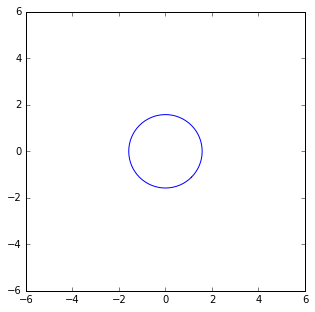

In [3]:
key = '3cm circle'
input_dict[key] = dict()

input_dict[key]['factor'] = 0.9296

XCoords, YCoords = generic_shape_convert(3/0.95, 3/0.95, 'circle')
input_dict[key]['XCoords'] = XCoords
input_dict[key]['YCoords'] = YCoords
input_dict[key]['applicator'] = applicator
input_dict[key]['energy'] = energy
input_dict[key]['ssd'] = ssd

plt.figure(figsize=(5,5))
plt.plot(XCoords, YCoords)
plt.xlim([-applicator/2 - 1, applicator/2 + 1])
plt.ylim([-applicator/2 - 1, applicator/2 + 1])

(-6.0, 6.0)

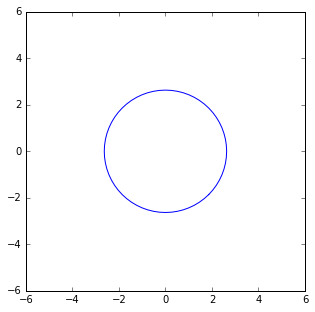

In [4]:
key = '5cm circle'
input_dict[key] = dict()

input_dict[key]['factor'] = 0.9705

XCoords, YCoords = generic_shape_convert(5/0.95, 5/0.95, 'circle')
input_dict[key]['XCoords'] = XCoords
input_dict[key]['YCoords'] = YCoords
input_dict[key]['applicator'] = applicator
input_dict[key]['energy'] = energy
input_dict[key]['ssd'] = ssd

plt.figure(figsize=(5,5))
plt.plot(XCoords, YCoords)
plt.xlim([-applicator/2 - 1, applicator/2 + 1])
plt.ylim([-applicator/2 - 1, applicator/2 + 1])

(-6.0, 6.0)

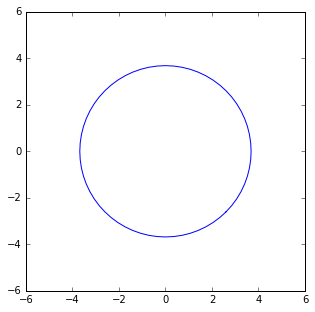

In [5]:
key = '7cm circle'
input_dict[key] = dict()

input_dict[key]['factor'] = 1.0032

XCoords, YCoords = generic_shape_convert(7/0.95, 7/0.95, 'circle')
input_dict[key]['XCoords'] = XCoords
input_dict[key]['YCoords'] = YCoords
input_dict[key]['applicator'] = applicator
input_dict[key]['energy'] = energy
input_dict[key]['ssd'] = ssd

plt.figure(figsize=(5,5))
plt.plot(XCoords, YCoords)
plt.xlim([-applicator/2 - 1, applicator/2 + 1])
plt.ylim([-applicator/2 - 1, applicator/2 + 1])

(-6.0, 6.0)

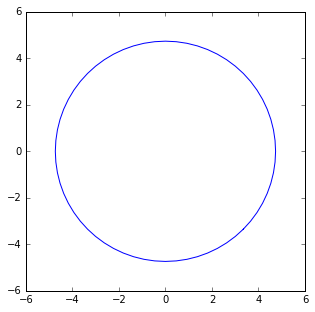

In [6]:
key = '9cm circle'
input_dict[key] = dict()

input_dict[key]['factor'] = 1.0084

XCoords, YCoords = generic_shape_convert(9/0.95, 9/0.95, 'circle')
input_dict[key]['XCoords'] = XCoords
input_dict[key]['YCoords'] = YCoords
input_dict[key]['applicator'] = applicator
input_dict[key]['energy'] = energy
input_dict[key]['ssd'] = ssd


plt.figure(figsize=(5,5))
plt.plot(XCoords, YCoords)
plt.xlim([-applicator/2 - 1, applicator/2 + 1])
plt.ylim([-applicator/2 - 1, applicator/2 + 1])

(-6.0, 6.0)

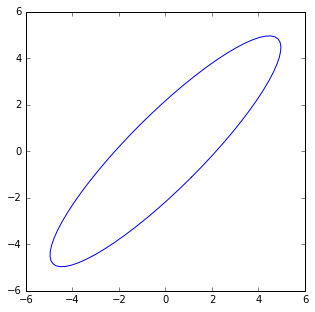

In [7]:
key = '3x13cm ellipse'
input_dict[key] = dict()

input_dict[key]['factor'] = 0.9530

XCoords, YCoords = generic_shape_convert(3/0.95, 13/0.95, 'ellipse')
input_dict[key]['XCoords'] = XCoords
input_dict[key]['YCoords'] = YCoords
input_dict[key]['applicator'] = applicator
input_dict[key]['energy'] = energy
input_dict[key]['ssd'] = ssd


plt.figure(figsize=(5,5))
plt.plot(XCoords, YCoords)
plt.xlim([-applicator/2 - 1, applicator/2 + 1])
plt.ylim([-applicator/2 - 1, applicator/2 + 1])

(-6.0, 6.0)

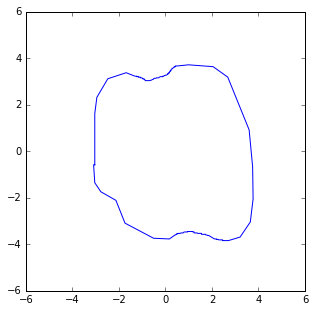

In [8]:
key = '1st clinical insert'
input_dict[key] = dict()

input_dict[key]['factor'] = 0.9931

XCoords = [-3.04, -3.04, -3.04, -2.95, -2.48, -1.69, -1.31, -1.28, -1.25, -1.23,
    -1.23, -1.21, -1.18, -1.16, -1.16, -1.14, -1.12, -1.08, -1.08, -1.04, -1.01, -0.99,
    -0.99, -0.97, -0.95, -0.92, -0.92, -0.89, -0.87, -0.84, -0.82, -0.8, -0.77, -0.75,
    -0.73, -0.71, -0.67, -0.63, -0.6, -0.56, -0.53, -0.51, -0.48, -0.46, -0.43, -0.41,
    -0.39, -0.36, -0.32, -0.29, -0.26, -0.22, -0.19, -0.17, -0.15, -0.12, -0.12, -0.09,
    -0.07, -0.05, -0.02, 0.02, 0.05, 0.09, 0.09, 0.12, 0.12, 0.15, 0.15, 0.17, 0.17,
    0.19, 0.19, 0.22, 0.22, 0.24, 0.24, 0.26, 0.29, 0.29, 0.32, 0.34, 0.36, 0.39,
    0.39, 0.41, 0.43, 0.43, 0.51, 0.99, 2.05, 2.68, 3.24, 3.6, 3.75, 3.77, 3.65, 3.21,
    2.71, 2.68, 2.65, 2.63, 2.61, 2.59, 2.56, 2.54, 2.52, 2.48, 2.46, 2.46, 2.44,
    2.41, 2.39, 2.37, 2.35, 2.32, 2.29, 2.27, 2.24, 2.22, 2.2, 2.2, 2.18, 2.15, 2.13,
    2.11, 1.86, 1.83, 1.81, 1.79, 1.77, 1.74, 1.72, 1.69, 1.66, 1.64, 1.55, 1.55,
    1.55, 1.53, 1.47, 1.45, 1.42, 1.4, 1.38, 1.36, 1.33, 1.31, 1.28, 1.25, 1.23, 1.23,
    1.21, 1.18, 1.18, 1.16, 1.14, 1.12, 1.08, 1.06, 1.04, 1.01, 0.99, 0.97, 0.95,
    0.95, 0.92, 0.89, 0.87, 0.84, 0.82, 0.8, 0.77, 0.75, 0.73, 0.71, 0.67, 0.65, 0.63,
    0.6, 0.58, 0.56, 0.53, 0.53, 0.51, 0.48, 0.48, 0.46, 0.43, 0.41, 0.17, -0.51,
    -1.74, -2.13, -2.78, -3.04, -3.09, -3.04]
YCoords = [-0.58, 0.63, 1.62, 2.32, 3.12, 3.38, 3.23, 3.23, 3.23, 3.23, 3.21, 3.21,
    3.21, 3.21, 3.19, 3.19, 3.19, 3.19, 3.16, 3.16, 3.16, 3.14, 3.12, 3.12, 3.12,
    3.12, 3.09, 3.09, 3.04, 3.04, 3.04, 3.04, 3.04, 3.04, 3.04, 3.04, 3.04, 3.06,
    3.06, 3.09, 3.09, 3.12, 3.14, 3.14, 3.14, 3.14, 3.16, 3.16, 3.16, 3.16, 3.19,
    3.21, 3.21, 3.21, 3.21, 3.21, 3.23, 3.23, 3.23, 3.26, 3.26, 3.28, 3.28, 3.31,
    3.33, 3.33, 3.36, 3.36, 3.38, 3.38, 3.4, 3.43, 3.45, 3.45, 3.47, 3.47, 3.51, 3.53,
    3.55, 3.57, 3.57, 3.6, 3.62, 3.62, 3.64, 3.64, 3.64, 3.67, 3.67, 3.72, 3.64, 3.19,
    1.81, 0.92, -0.67, -2.05, -3.04, -3.69, -3.84, -3.84, -3.84, -3.84, -3.84, -3.84,
    -3.84, -3.84, -3.84, -3.84, -3.84, -3.81, -3.81, -3.81, -3.81, -3.81, -3.81, -3.81,
    -3.81, -3.79, -3.79, -3.79, -3.79, -3.77, -3.77, -3.77, -3.77, -3.77, -3.62, -3.62,
    -3.62, -3.6, -3.6, -3.6, -3.57, -3.57, -3.57, -3.57, -3.57, -3.55, -3.53, -3.53,
    -3.53, -3.53, -3.53, -3.53, -3.53, -3.51, -3.51, -3.51, -3.51, -3.51, -3.51, -3.47,
    -3.47, -3.47, -3.45, -3.45, -3.45, -3.45, -3.45, -3.45, -3.45, -3.45, -3.45, -3.45,
    -3.45, -3.47, -3.47, -3.47, -3.47, -3.47, -3.47, -3.47, -3.51, -3.51, -3.51, -3.51,
    -3.51, -3.53, -3.53, -3.53, -3.53, -3.53, -3.53, -3.55, -3.55, -3.55, -3.57, -3.57,
    -3.6, -3.6, -3.77, -3.74, -3.09, -2.11, -1.74, -1.35, -0.58, -0.58]
input_dict[key]['XCoords'] = XCoords
input_dict[key]['YCoords'] = YCoords
input_dict[key]['applicator'] = applicator
input_dict[key]['energy'] = energy
input_dict[key]['ssd'] = ssd


plt.figure(figsize=(5,5))
plt.plot(XCoords, YCoords)
plt.xlim([-applicator/2 - 1, applicator/2 + 1])
plt.ylim([-applicator/2 - 1, applicator/2 + 1])

(-6.0, 6.0)

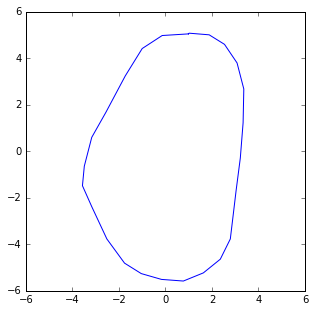

In [9]:
key = '2nd clinical insert'
input_dict[key] = dict()

input_dict[key]['factor'] = 0.9931

XCoords = [0.99, -0.14, -1.0, -1.73, -2.56, -3.17, -3.49, -3.57, -3.17, -2.52, -1.76,
    -1.04, -0.17, 0.77, 1.63, 2.36, 2.79, 2.91, 3.04, 3.22, 3.34, 3.37, 3.08, 2.54,
    1.88, 1.02, 0.99]
YCoords = [5.05, 4.98, 4.42, 3.24, 1.68, 0.6, -0.64, -1.48, -2.38, -3.77, -4.81,
    -5.26, -5.51, -5.58, -5.23, -4.64, -3.77, -2.77, -1.68, -0.29, 1.23, 2.68, 3.8,
    4.6, 5.01, 5.08, 5.05]
input_dict[key]['XCoords'] = XCoords
input_dict[key]['YCoords'] = YCoords
input_dict[key]['applicator'] = applicator
input_dict[key]['energy'] = energy
input_dict[key]['ssd'] = ssd


plt.figure(figsize=(5,5))
plt.plot(XCoords, YCoords)
plt.xlim([-applicator/2 - 1, applicator/2 + 1])
plt.ylim([-applicator/2 - 1, applicator/2 + 1])

(-6.0, 6.0)

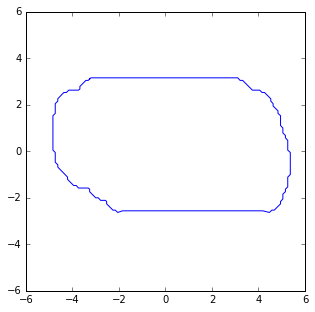

In [10]:
key = '3rd clinical insert'
input_dict[key] = dict()

input_dict[key]['factor'] = 0.9989

XCoords = [-3.26, -3.21, 3.11, 3.21, 3.32, 3.74, 4.05, 4.16, 4.26, 4.53, 4.53, 4.63,
    4.63, 4.84, 4.84, 4.95, 4.95, 5.05, 5.05, 5.16, 5.16, 5.26, 5.26, 5.37, 5.37,
    5.26, 5.26, 5.16, 5.16, 5.05, 5.05, 4.95, 4.95, 4.68, 4.58, 4.47, 4.19, -1.85,
    -2.05, -2.16, -2.26, -2.53, -2.53, -2.58, -2.79, -2.89, -3.0, -3.26, -3.26, -3.32,
    -3.74, -3.84, -3.95, -4.21, -4.21, -4.63, -4.63, -4.74, -4.74, -4.84, -4.84, -4.74,
    -4.74, -4.63, -4.63, -4.37, -4.26, -4.16, -3.74, -3.68, -3.68, -3.42, -3.32, -3.26]
YCoords = [3.11, 3.16, 3.16, 3.05, 3.05, 2.63, 2.63, 2.53, 2.53, 2.26, 2.16, 2.05,
    1.95, 1.74, 1.63, 1.53, 1.11, 1.0, 0.79, 0.68, 0.58, 0.47, 0.05, -0.05, -1.0,
    -1.11, -1.53, -1.63, -1.74, -1.84, -2.05, -2.16, -2.26, -2.53, -2.53, -2.63, -2.56,
    -2.56, -2.63, -2.53, -2.53, -2.26, -2.16, -2.11, -2.11, -2.0, -2.0, -1.74, -1.63,
    -1.58, -1.58, -1.47, -1.47, -1.21, -1.11, -0.68, -0.58, -0.47, -0.05, 0.05, 1.53,
    1.63, 2.05, 2.16, 2.26, 2.53, 2.53, 2.63, 2.63, 2.68, 2.79, 3.05, 3.05, 3.11]
input_dict[key]['XCoords'] = XCoords
input_dict[key]['YCoords'] = YCoords
input_dict[key]['applicator'] = applicator
input_dict[key]['energy'] = energy
input_dict[key]['ssd'] = ssd


plt.figure(figsize=(5,5))
plt.plot(XCoords, YCoords)
plt.xlim([-applicator/2 - 1, applicator/2 + 1])
plt.ylim([-applicator/2 - 1, applicator/2 + 1])

(-6.0, 6.0)

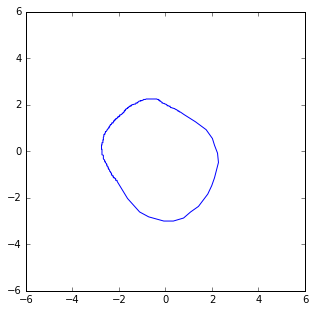

In [11]:
key = '4th clinical insert'
input_dict[key] = dict()

input_dict[key]['factor'] = 0.9634

XCoords = [-1.05, -1.03, -1.01, -0.98, -0.96, -0.94, -0.88, -0.86, -0.83, -0.79,
    -0.76, -0.74, -0.72, -0.68, -0.66, -0.64, -0.61, -0.59, -0.57, -0.54, -0.52, -0.49,
    -0.46, -0.44, -0.42, -0.39, -0.37, -0.35, -0.32, -0.29, -0.29, -0.27, -0.27, -0.24,
    -0.24, -0.22, -0.2, -0.15, -0.15, -0.13, -0.09, -0.05, -0.02, 0.0, 0.05, 0.07,
    0.07, 0.09, 0.13, 0.15, 0.2, 0.2, 0.22, 0.24, 0.27, 0.29, 0.32, 0.37, 0.39, 0.42,
    0.44, 0.46, 0.49, 0.52, 0.57, 0.57, 0.59, 0.61, 0.64, 0.8, 1.29, 1.75, 2.02, 2.11,
    2.24, 2.28, 2.21, 2.11, 1.99, 1.82, 1.42, 1.08, 0.78, 0.34, -0.07, -0.72, -1.11,
    -1.63, -2.03, -2.08, -2.08, -2.08, -2.11, -2.14, -2.14, -2.14, -2.14, -2.16, -2.18,
    -2.21, -2.21, -2.23, -2.23, -2.25, -2.25, -2.25, -2.28, -2.31, -2.31, -2.31, -2.33,
    -2.33, -2.33, -2.36, -2.36, -2.38, -2.4, -2.4, -2.4, -2.43, -2.43, -2.45, -2.45,
    -2.45, -2.47, -2.47, -2.47, -2.51, -2.51, -2.51, -2.53, -2.53, -2.53, -2.55, -2.58,
    -2.58, -2.6, -2.6, -2.6, -2.62, -2.62, -2.62, -2.65, -2.67, -2.67, -2.67, -2.67,
    -2.67, -2.67, -2.67, -2.73, -2.73, -2.73, -2.73, -2.73, -2.73, -2.73, -2.73, -2.73,
    -2.73, -2.73, -2.75, -2.75, -2.75, -2.75, -2.75, -2.75, -2.75, -2.73, -2.73, -2.73,
    -2.73, -2.73, -2.69, -2.69, -2.69, -2.69, -2.69, -2.69, -2.67, -2.67, -2.67, -2.67,
    -2.67, -2.67, -2.65, -2.65, -2.65, -2.65, -2.62, -2.62, -2.6, -2.6, -2.6, -2.58,
    -2.58, -2.58, -2.55, -2.53, -2.51, -2.51, -2.47, -2.47, -2.45, -2.43, -2.43, -2.43,
    -2.4, -2.4, -2.38, -2.36, -2.36, -2.33, -2.31, -2.31, -2.28, -2.25, -2.25, -2.23,
    -2.23, -2.21, -2.21, -2.18, -2.18, -2.16, -2.16, -2.14, -2.14, -2.11, -2.11, -2.08,
    -2.06, -2.06, -2.03, -2.03, -2.01, -1.99, -1.99, -1.96, -1.96, -1.96, -1.94, -1.92,
    -1.88, -1.86, -1.86, -1.84, -1.81, -1.79, -1.79, -1.77, -1.77, -1.74, -1.74, -1.72,
    -1.72, -1.72, -1.69, -1.66, -1.64, -1.64, -1.62, -1.62, -1.59, -1.57, -1.55, -1.55,
    -1.52, -1.49, -1.49, -1.47, -1.47, -1.44, -1.42, -1.4, -1.37, -1.35, -1.33, -1.29,
    -1.27, -1.27, -1.25, -1.22, -1.2, -1.2, -1.18, -1.15, -1.13, -1.11, -1.07, -1.05]
YCoords = [2.18, 2.18, 2.18, 2.2, 2.2, 2.23, 2.23, 2.23, 2.25, 2.25, 2.25, 2.25,
    2.25, 2.25, 2.25, 2.25, 2.25, 2.25, 2.25, 2.25, 2.25, 2.25, 2.25, 2.25, 2.25,
    2.25, 2.25, 2.23, 2.23, 2.23, 2.2, 2.2, 2.18, 2.18, 2.16, 2.16, 2.14, 2.11, 2.08,
    2.08, 2.06, 2.06, 2.03, 2.03, 2.01, 1.99, 1.96, 1.96, 1.96, 1.94, 1.94, 1.92,
    1.88, 1.88, 1.88, 1.86, 1.86, 1.84, 1.84, 1.81, 1.81, 1.79, 1.79, 1.74, 1.74,
    1.72, 1.72, 1.69, 1.69, 1.58, 1.27, 0.93, 0.55, 0.26, -0.08, -0.48, -0.75, -1.14,
    -1.48, -1.84, -2.37, -2.61, -2.87, -3.0, -3.0, -2.82, -2.61, -2.03, -1.38, -1.29,
    -1.27, -1.25, -1.25, -1.25, -1.22, -1.2, -1.18, -1.18, -1.15, -1.15, -1.13, -1.13,
    -1.11, -1.11, -1.07, -1.05, -1.05, -1.03, -1.0, -0.98, -0.98, -0.96, -0.93, -0.91,
    -0.88, -0.88, -0.85, -0.83, -0.81, -0.78, -0.76, -0.76, -0.74, -0.72, -0.72, -0.68,
    -0.66, -0.64, -0.61, -0.59, -0.59, -0.57, -0.54, -0.52, -0.49, -0.46, -0.46, -0.44,
    -0.42, -0.42, -0.39, -0.37, -0.35, -0.32, -0.29, -0.27, -0.24, -0.22, -0.2, -0.17,
    -0.15, -0.13, -0.09, -0.07, -0.05, -0.02, 0.0, 0.02, 0.05, 0.07, 0.09, 0.09, 0.13,
    0.15, 0.17, 0.2, 0.22, 0.27, 0.27, 0.29, 0.32, 0.35, 0.37, 0.37, 0.39, 0.42, 0.44,
    0.46, 0.49, 0.49, 0.52, 0.54, 0.57, 0.59, 0.61, 0.64, 0.66, 0.68, 0.72, 0.72,
    0.74, 0.74, 0.76, 0.78, 0.81, 0.83, 0.85, 0.85, 0.88, 0.91, 0.93, 0.96, 0.98,
    1.0, 1.0, 1.03, 1.05, 1.05, 1.07, 1.13, 1.13, 1.15, 1.15, 1.2, 1.22, 1.22, 1.22,
    1.25, 1.27, 1.29, 1.29, 1.33, 1.33, 1.35, 1.35, 1.37, 1.37, 1.4, 1.4, 1.42, 1.42,
    1.44, 1.47, 1.47, 1.49, 1.49, 1.49, 1.52, 1.52, 1.55, 1.57, 1.57, 1.57, 1.59,
    1.62, 1.64, 1.64, 1.66, 1.66, 1.69, 1.72, 1.74, 1.74, 1.77, 1.77, 1.79, 1.81,
    1.81, 1.84, 1.84, 1.86, 1.86, 1.88, 1.88, 1.92, 1.92, 1.94, 1.94, 1.94, 1.96,
    1.96, 1.99, 1.99, 2.01, 2.01, 2.01, 2.03, 2.03, 2.03, 2.06, 2.08, 2.08, 2.08,
    2.08, 2.11, 2.11, 2.14, 2.16, 2.16, 2.16, 2.18]
input_dict[key]['XCoords'] = XCoords
input_dict[key]['YCoords'] = YCoords
input_dict[key]['applicator'] = applicator
input_dict[key]['energy'] = energy
input_dict[key]['ssd'] = ssd


plt.figure(figsize=(5,5))
plt.plot(XCoords, YCoords)
plt.xlim([-applicator/2 - 1, applicator/2 + 1])
plt.ylim([-applicator/2 - 1, applicator/2 + 1])

(-6.0, 6.0)

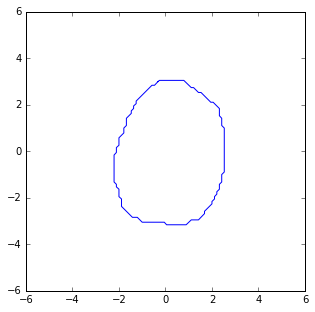

In [12]:
key = '5th clinical insert'
input_dict[key] = dict()

input_dict[key]['factor'] = 0.9683

XCoords = [-0.32, -0.26, 0.79, 1.11, 1.21, 1.42, 1.53, 1.95, 2.05, 2.32, 2.32, 2.42,
    2.42, 2.53, 2.53, 2.42, 2.42, 2.32, 2.32, 2.21, 2.21, 2.11, 2.11, 2.0, 2.0, 1.68,
    1.68, 1.42, 1.11, 0.89, 0.05, -0.05, -1.0, -1.21, -1.42, -1.89, -1.89, -2.0, -2.0,
    -2.11, -2.11, -2.21, -2.21, -2.11, -2.11, -2.0, -2.0, -1.79, -1.79, -1.68, -1.68,
    -1.47, -1.47, -1.37, -1.37, -1.26, -1.26, -0.58, -0.47, -0.32]
YCoords = [3.0, 3.05, 3.05, 2.74, 2.74, 2.53, 2.53, 2.11, 2.11, 1.84, 1.53, 1.42,
    1.11, 1.0, -0.89, -1.0, -1.32, -1.42, -1.63, -1.74, -1.84, -1.95, -2.05, -2.16,
    -2.26, -2.58, -2.68, -2.95, -2.95, -3.16, -3.16, -3.05, -3.05, -2.84, -2.84, -2.37,
    -2.05, -1.95, -1.63, -1.53, -1.42, -1.32, -0.16, -0.05, 0.16, 0.26, 0.58, 0.79,
    1.0, 1.11, 1.42, 1.63, 1.74, 1.84, 1.95, 2.05, 2.16, 2.84, 2.84, 3.0]
input_dict[key]['XCoords'] = XCoords
input_dict[key]['YCoords'] = YCoords
input_dict[key]['applicator'] = applicator
input_dict[key]['energy'] = energy
input_dict[key]['ssd'] = ssd


plt.figure(figsize=(5,5))
plt.plot(XCoords, YCoords)
plt.xlim([-applicator/2 - 1, applicator/2 + 1])
plt.ylim([-applicator/2 - 1, applicator/2 + 1])

(-6.0, 6.0)

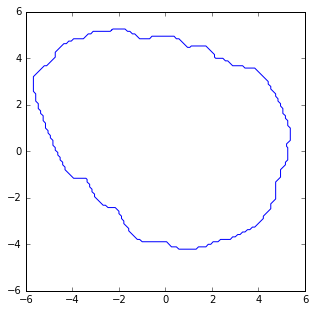

In [13]:
key = '6th clinical insert'
input_dict[key] = dict()

input_dict[key]['factor'] = 1.0067

XCoords = [-2.32, -2.26, -1.74, -1.63, -1.53, -1.42, -1.32, -1.11, -0.68, -0.58,
    0.37, 0.47, 0.58, 0.95, 1.05, 1.11, 1.74, 2.11, 2.11, 2.16, 2.47, 2.58, 2.68,
    2.89, 3.32, 3.42, 3.84, 4.42, 4.42, 4.53, 4.53, 4.74, 4.74, 4.84, 4.84, 4.95,
    4.95, 5.05, 5.05, 5.16, 5.16, 5.26, 5.26, 5.37, 5.37, 5.21, 5.21, 5.26, 5.26,
    5.16, 5.16, 4.95, 4.95, 4.74, 4.74, 4.53, 4.53, 4.21, 4.21, 3.84, 3.74, 3.63,
    3.53, 3.42, 3.32, 3.21, 3.11, 3.0, 2.89, 2.79, 2.37, 2.26, 2.05, 1.95, 1.84, 1.74,
    1.42, 1.32, 0.58, 0.47, 0.26, 0.05, -1.0, -1.11, -1.21, -1.58, -1.58, -1.79, -1.79,
    -1.89, -1.89, -2.0, -2.0, -2.16, -2.47, -2.58, -2.68, -3.05, -3.05, -3.16, -3.16,
    -3.26, -3.26, -3.37, -3.37, -3.42, -3.95, -4.32, -4.32, -4.42, -4.42, -4.53, -4.53,
    -4.63, -4.63, -4.74, -4.74, -4.84, -4.84, -4.95, -4.95, -5.05, -5.05, -5.16, -5.16,
    -5.26, -5.26, -5.37, -5.37, -5.47, -5.47, -5.58, -5.58, -5.68, -5.68, -5.21, -5.11,
    -4.74, -4.74, -4.37, -4.26, -4.16, -4.05, -3.95, -3.53, -3.32, -3.21, -3.11, -2.37,
    -2.32]
YCoords = [5.21, 5.26, 5.26, 5.16, 5.16, 5.05, 5.05, 4.84, 4.84, 4.95, 4.95, 4.84,
    4.84, 4.47, 4.47, 4.53, 4.53, 4.16, 4.05, 4.0, 4.0, 3.89, 3.89, 3.68, 3.68, 3.58,
    3.58, 3.0, 2.89, 2.79, 2.68, 2.47, 2.37, 2.26, 2.16, 2.05, 1.95, 1.84, 1.63, 1.53,
    1.42, 1.32, 1.11, 1.0, 0.47, 0.32, 0.21, 0.16, -0.37, -0.47, -0.58, -0.79, -1.11,
    -1.32, -2.05, -2.26, -2.47, -2.79, -2.89, -3.26, -3.26, -3.37, -3.37, -3.47, -3.47,
    -3.58, -3.58, -3.68, -3.68, -3.79, -3.79, -3.89, -3.89, -4.0, -4.0, -4.11, -4.11,
    -4.21, -4.21, -4.11, -4.11, -3.89, -3.89, -3.79, -3.79, -3.42, -3.32, -3.11, -3.0,
    -2.89, -2.79, -2.68, -2.58, -2.42, -2.42, -2.32, -2.32, -1.95, -1.84, -1.74, -1.63,
    -1.53, -1.42, -1.32, -1.21, -1.16, -1.16, -0.79, -0.68, -0.58, -0.47, -0.37, -0.26,
    -0.16, -0.05, 0.05, 0.16, 0.26, 0.47, 0.58, 0.68, 0.79, 0.89, 1.0, 1.21, 1.32,
    1.53, 1.63, 1.74, 1.84, 2.05, 2.16, 2.47, 2.58, 3.21, 3.68, 3.68, 4.05, 4.26,
    4.63, 4.63, 4.74, 4.74, 4.84, 4.84, 5.05, 5.05, 5.16, 5.16, 5.21]
input_dict[key]['XCoords'] = XCoords
input_dict[key]['YCoords'] = YCoords
input_dict[key]['applicator'] = applicator
input_dict[key]['energy'] = energy
input_dict[key]['ssd'] = ssd


plt.figure(figsize=(5,5))
plt.plot(XCoords, YCoords)
plt.xlim([-applicator/2 - 1, applicator/2 + 1])
plt.ylim([-applicator/2 - 1, applicator/2 + 1])

(-6.0, 6.0)

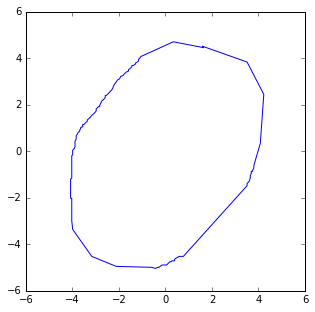

In [14]:
key = '7th clinical insert'
input_dict[key] = dict()

input_dict[key]['factor'] = 1.0052

XCoords = [1.63, 0.34, -1.05, -1.16, -1.16, -1.29, -1.29, -1.39, -1.44, -1.44, -1.48,
    -1.59, -1.59, -1.68, -1.78, -1.82, -1.93, -1.97, -2.06, -2.12, -2.16, -2.25, -2.25,
    -2.31, -2.36, -2.4, -2.45, -2.49, -2.55, -2.59, -2.59, -2.64, -2.74, -2.79, -2.83,
    -2.83, -2.88, -2.93, -2.98, -2.98, -2.98, -3.07, -3.17, -3.22, -3.36, -3.36, -3.41,
    -3.46, -3.51, -3.56, -3.56, -3.6, -3.65, -3.65, -3.69, -3.69, -3.75, -3.8, -3.84,
    -3.84, -3.84, -3.89, -3.89, -3.89, -3.89, -3.89, -3.94, -3.99, -3.99, -3.99, -3.99,
    -4.03, -4.03, -4.03, -4.03, -4.03, -4.03, -4.03, -4.03, -4.03, -4.03, -4.03, -4.03,
    -4.03, -4.03, -4.03, -4.08, -4.08, -4.08, -4.08, -4.08, -4.08, -4.08, -4.08, -4.08,
    -4.08, -4.08, -4.03, -4.03, -4.03, -4.03, -4.03, -4.03, -4.03, -4.03, -4.03, -4.03,
    -4.03, -4.03, -4.03, -4.03, -4.03, -3.99, -3.17, -2.12, -0.62, -0.58, -0.43, -0.34,
    -0.28, -0.15, 0.0, 0.05, 0.09, 0.19, 0.24, 0.28, 0.39, 0.39, 0.43, 0.53, 0.58,
    0.67, 0.72, 0.77, 3.51, 3.51, 3.6, 3.65, 3.65, 3.69, 3.69, 3.75, 3.75, 3.8, 3.8,
    4.08, 4.23, 3.51, 1.59, 1.63]
YCoords = [4.46, 4.71, 4.08, 3.94, 3.88, 3.79, 3.75, 3.69, 3.69, 3.65, 3.6, 3.51,
    3.45, 3.41, 3.32, 3.26, 3.22, 3.12, 3.07, 2.98, 2.93, 2.78, 2.74, 2.64, 2.59,
    2.55, 2.49, 2.45, 2.4, 2.4, 2.31, 2.25, 2.16, 2.06, 1.97, 1.92, 1.92, 1.87, 1.82,
    1.78, 1.73, 1.63, 1.54, 1.48, 1.35, 1.29, 1.25, 1.2, 1.15, 1.15, 1.05, 1.05, 1.01,
    0.96, 0.92, 0.86, 0.82, 0.72, 0.67, 0.58, 0.53, 0.43, 0.34, 0.28, 0.24, 0.19,
    0.09, 0.05, 0.0, -0.09, -0.15, -0.19, -0.34, -0.38, -0.43, -0.48, -0.53, -0.62,
    -0.67, -0.72, -0.77, -0.82, -0.86, -0.92, -1.01, -1.15, -1.2, -1.29, -1.39, -1.48,
    -1.54, -1.63, -1.73, -1.78, -1.82, -1.97, -2.02, -2.02, -2.06, -2.16, -2.25, -2.31,
    -2.35, -2.45, -2.49, -2.55, -2.68, -2.74, -2.78, -2.83, -2.88, -2.98, -3.36, -4.52,
    -4.95, -4.99, -4.99, -5.04, -4.99, -4.99, -4.89, -4.89, -4.89, -4.85, -4.75, -4.75,
    -4.71, -4.71, -4.65, -4.61, -4.56, -4.52, -4.52, -4.52, -4.52, -1.48, -1.39, -1.29,
    -1.15, -1.05, -0.96, -0.86, -0.86, -0.82, -0.72, -0.62, 0.34, 2.45, 3.84, 4.52,
    4.46]
input_dict[key]['XCoords'] = XCoords
input_dict[key]['YCoords'] = YCoords
input_dict[key]['applicator'] = applicator
input_dict[key]['energy'] = energy
input_dict[key]['ssd'] = ssd


plt.figure(figsize=(5,5))
plt.plot(XCoords, YCoords)
plt.xlim([-applicator/2 - 1, applicator/2 + 1])
plt.ylim([-applicator/2 - 1, applicator/2 + 1])

### Parameterising the shapes via equivalent ellipse

Before modelling the shapes need to be able to be parameterised. This is done as so:

3x13cm ellipse:


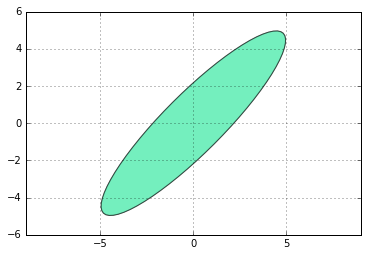

3cm circle:


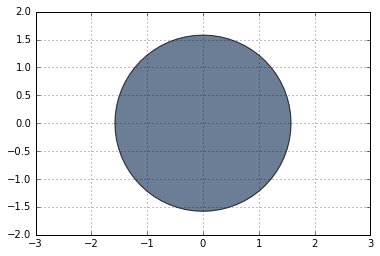

5th clinical insert:


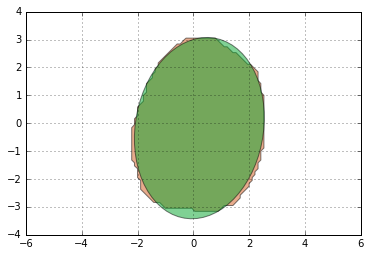

9cm circle:


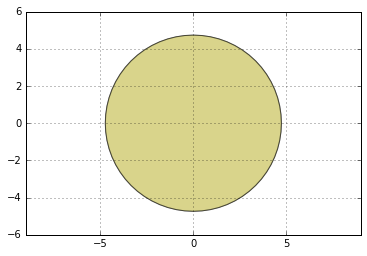

6th clinical insert:


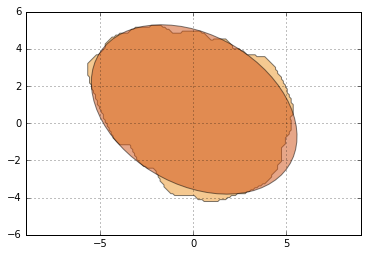

2nd clinical insert:


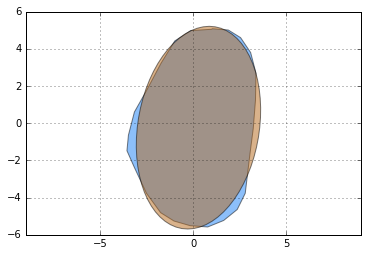

1st clinical insert:


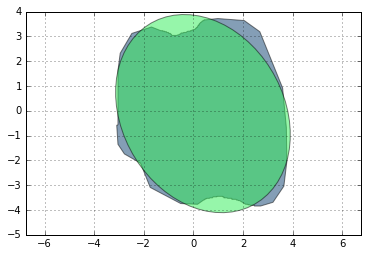

5cm circle:


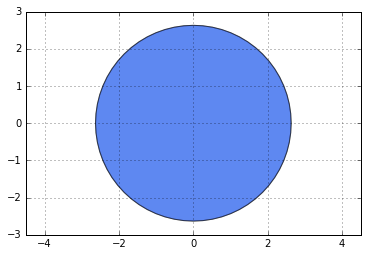

4th clinical insert:


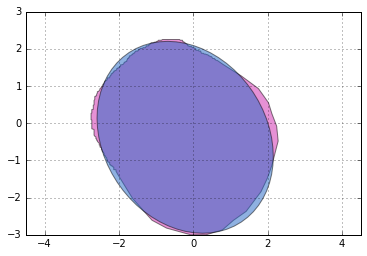

7th clinical insert:


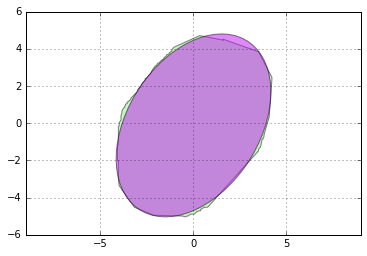

3rd clinical insert:


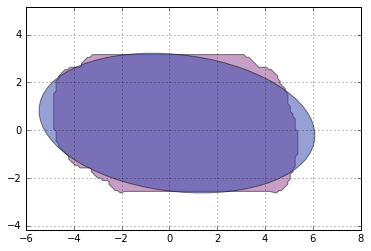

7cm circle:


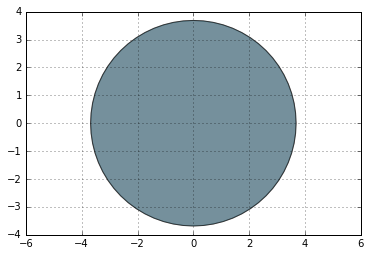

In [15]:
parameterised = parameterise(
    display=True, working_directory=None, optimise_position=True,
    input_dict=input_dict)

### Creating an interactive report

Once the data has been parameterised the model can be created. This is done so in the following cell. Of interest is that these interactive reports can be saved to a html file and placed on a shared drive. No python is required to use these interactive reports, only a modern web browser.

The table in the report can be sorted and items can be selected. These slections are mirrored in the plots. Portions of the plots / colourbar can be selected which is then mirrored in the remaining plots.

In [17]:
create_report(
    input_dict=parameterised, output_to_file=False,
    filepath=None) # filepath='example.html' required to output to file

## Copyright information
Copyright &#169; 2015  Simon Biggs

This program is free software: you can redistribute it and/or modify
it under the terms of the GNU Affero General Public License as published
by the Free Software Foundation, either version 3 of the License, or
(at your option) any later version.

This program is distributed in the hope that it will be useful,
but WITHOUT ANY WARRANTY; without even the implied warranty of
MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.  See the
GNU Affero General Public License for more details.

You should have received a copy of the GNU Affero General Public License
along with this program.  If not, see <http://www.gnu.org/licenses/>.